In [36]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [25]:
train = pd.read_json('Data/train.json')

In [53]:
ny = gpd.read_file("Data/ZillowNeighborhoods-NY/ZillowNeighborhoods-NY.shp")
nyc = ny[ny['City']=='New York'][['County', 'Name', 'RegionID', 'geometry']]
nyc

,County,Name,RegionID,geometry
2,Queens,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
5,Queens,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
10,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
13,Queens,Howard Beach,21970,POLYGON ((-73.85608525799972 40.65037135900031...
16,Queens,Breezy Point,37557,POLYGON ((-73.90962826099991 40.56552556300005...
21,Queens,Neponsit,42662,POLYGON ((-73.85990620999991 40.56700771800007...
23,Queens,East Elmhurst,45032,POLYGON ((-73.86286955999992 40.76695847800005...
25,Bronx,West Farms,48417,POLYGON ((-73.87729106686085 40.84245433729515...
27,Queens,Cambria Heights,50348,POLYGON ((-73.73909357074226 40.70117794641342...
33,Queens,Fresh Meadows,4819,POLYGON ((-73.76991237739721 40.74150740314482...


In [57]:
first100 = train[['listing_id', 'latitude', 'longitude']].head(100)
geometry = [Point(xy) for xy in zip(first100.longitude, first100.latitude)]
first100 = first100.drop(['longitude', 'latitude'], axis=1)
crs = nyc.crs
geo_df = gpd.GeoDataFrame(first100, crs=crs, geometry=geometry)

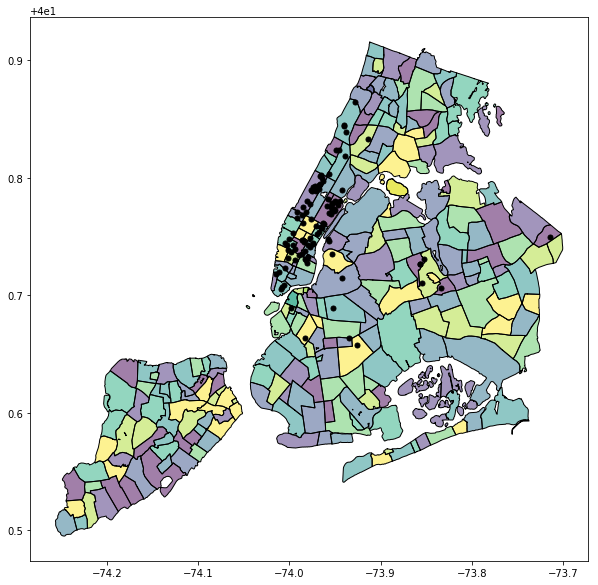

In [58]:
fig, ax = plt.subplots(1, figsize=(10,10))
nyc.plot(ax=ax)
geo_df.plot(ax=ax, color="black", markersize=5)

In [59]:
assigned = gpd.tools.sjoin(geo_df, nyc, how="left")

In [61]:
assigned

,listing_id,geometry,index_right,County,Name,RegionID
10,7211212,POINT (-73.9425 40.7145),230,Kings,Williamsburg,199001
10000,7150865,POINT (-73.9667 40.7947),317,New York,Upper West Side,270958
100004,6887163,POINT (-74.0018 40.7388),283,New York,West Village,270964
100007,6888711,POINT (-73.96769999999999 40.7539),279,New York,Turtle Bay,270953
100013,6934781,POINT (-73.94929999999999 40.8241),242,New York,Hamilton Heights,270850
100014,6894514,POINT (-74.00279999999999 40.7429),434,New York,Chelsea,276254
100016,6930771,POINT (-73.96599999999999 40.8012),317,New York,Upper West Side,270958
100020,6867392,POINT (-73.9957 40.7427),434,New York,Chelsea,276254
100026,6898799,POINT (-73.9457 40.8234),242,New York,Hamilton Heights,270850
100027,6814332,POINT (-73.9808 40.7278),392,New York,East Village,270829
